# 📊 Отчёт по A/B-тесту кнопки заказа


**Цель:
Проверить, влияет ли новая кнопка заказа на количество заказов пользователей.**
- Данные
Всего пользователей: 100 000
- Группы:
Control — старая кнопка
Test — новая кнопка
- Сегменты:
  High (активные) и Low (менее активные)

**H₀ (нулевая гипотеза)**: различий в количестве заказов между control и test нет.

**H₁ (альтернативная гипотеза)**: новая кнопка изменяет количество заказов.

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
from scipy import stats 
from scipy.stats import shapiro
from scipy.stats import ttest_ind, mannwhitneyu

sns.set(rc={'figure.figsize':(16,6)}, style="whitegrid")

In [3]:
ab = pd.read_csv('events_AB_test.csv')

In [17]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       100000 non-null  int64 
 1   group    100000 non-null  object
 2   segment  100000 non-null  object
 3   events   100000 non-null  int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 2.7+ MB


In [4]:
ab.head(10)

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
5,49481,test,high,81.0
6,95408,test,high,57.0
7,7582,test,high,67.0
8,32404,test,high,73.0
9,12624,test,high,76.0


In [5]:
ab.tail()

,id,group,segment,events
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0
99999,42649,control,low,23.0


In [6]:
ab.dtypes

id           int64
group       object
segment     object
events     float64
dtype: object

In [7]:
ab.shape

(100000, 4)

In [8]:
ab.isna()

,id,group,segment,events
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99995,False,False,False,False
99996,False,False,False,False
99997,False,False,False,False
99998,False,False,False,False


In [9]:
ab.isna().sum()

id         0
group      0
segment    0
events     0
dtype: int64

In [11]:
ab['events']=ab['events'].astype('int')

In [12]:
ab['events']

0        78
1        71
2        80
3        80
4        78
         ..
99995    15
99996    16
99997    22
99998    21
99999    23
Name: events, Length: 100000, dtype: int32

In [13]:
ab['events'].describe()

count    100000.000000
mean         34.213930
std          17.585193
min           4.000000
25%          21.000000
50%          29.000000
75%          40.000000
max         102.000000
Name: events, dtype: float64

In [27]:
group=ab.groupby('group')['events'].describe().reset_index()

In [28]:
group

,group,count,mean,std,min,25%,50%,75%,max
0,control,50000.0,28.01942,16.835133,4.0,18.0,21.0,27.0,89.0
1,test,50000.0,40.40844,16.072244,13.0,30.0,35.0,42.0,102.0


In [24]:
ab.groupby('segment')['events'].describe().reset_index()

,segment,count,mean,std,min,25%,50%,75%,max
0,high,20000.0,64.95465,9.519024,31.0,58.0,65.0,71.0,102.0
1,low,80000.0,26.52875,8.281543,4.0,20.0,26.0,33.0,59.0


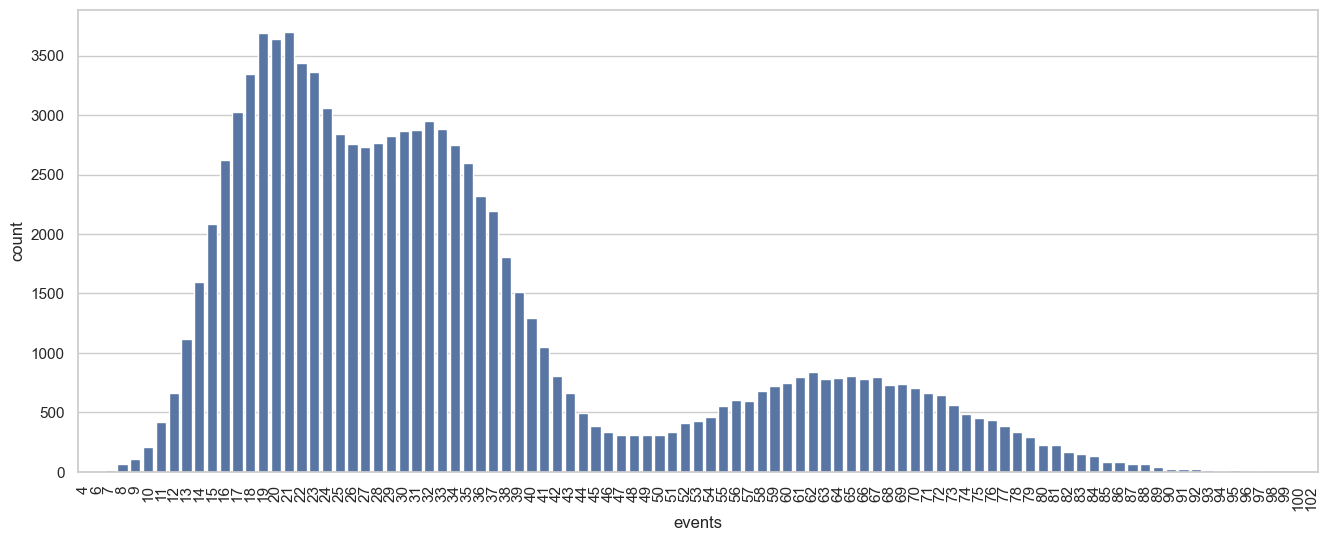

In [32]:
sns.countplot(x=ab.events)
plt.xticks(rotation=90)
plt.show()

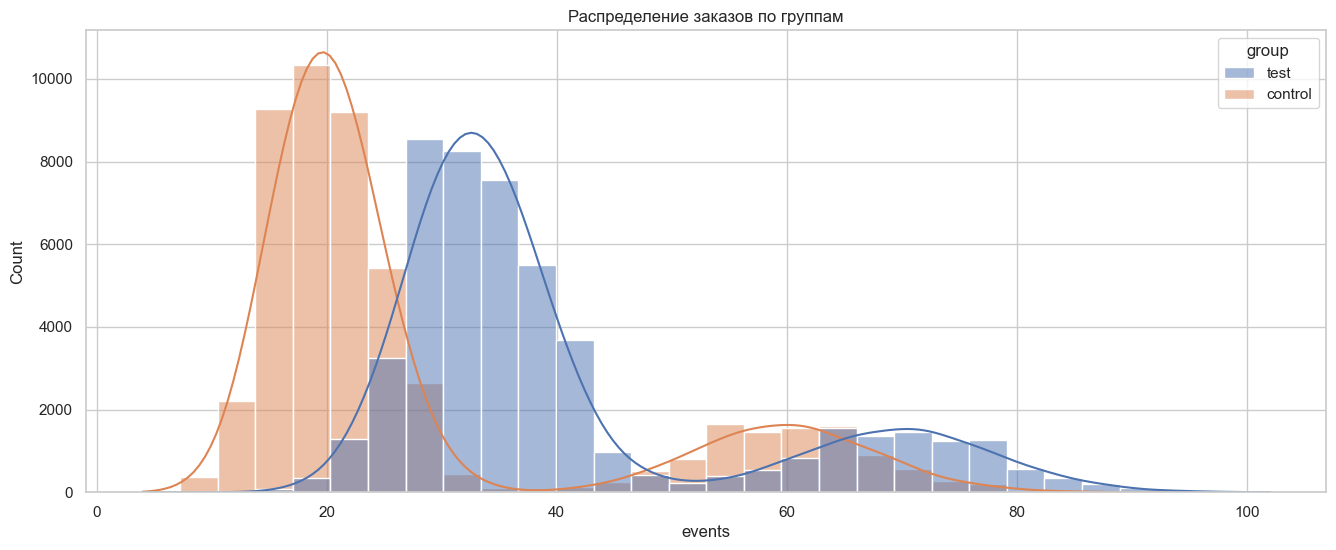

In [38]:
sns.histplot(data=ab, x='events', hue='group', kde=True, bins=30)
plt.title('Распределение заказов по группам')
plt.show()

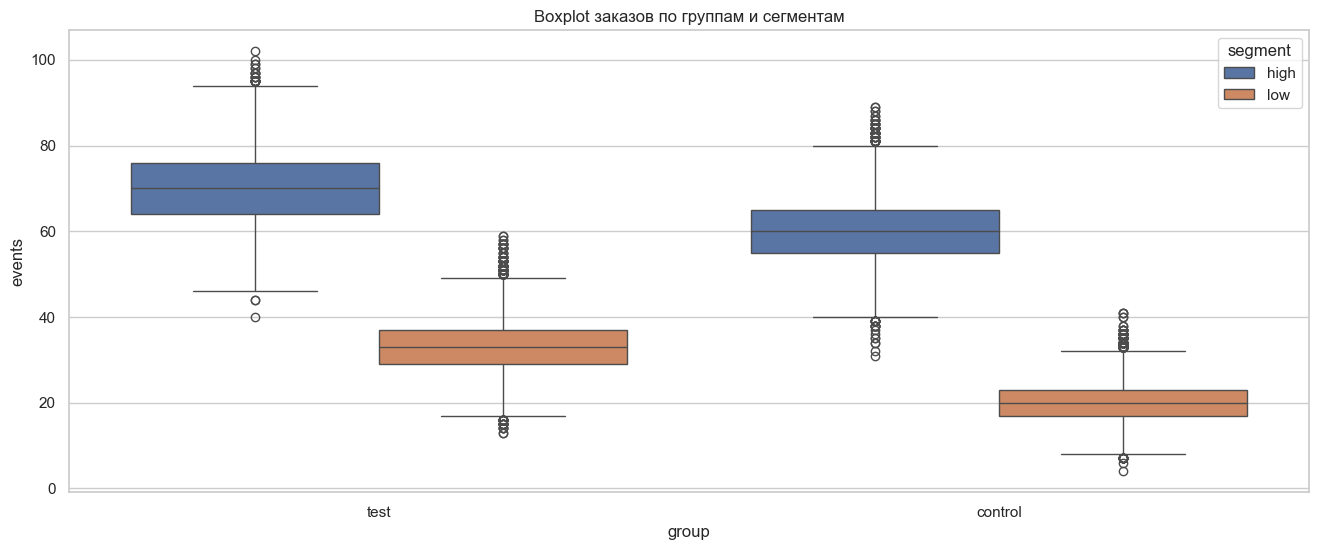

In [39]:
sns.boxplot(data=ab, x='group', y='events', hue='segment')
plt.title('Boxplot заказов по группам и сегментам')
plt.show()

In [46]:
for g in ab['group'].unique():
    stat, p = shapiro(ab[ab['group'] == g]['events'])
    print (f"{g}: stat={stat:.3f}, p={p:.3f}")
    if p < 0.05:
        print('Распределение не нормальное')
    else:
        print('Нет оснований отвергать нормальность')

test: stat=0.811, p=0.000
Распределение не нормальное
control: stat=0.744, p=0.000
Распределение не нормальное


C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50000.
  res = hypotest_fun_out(*samples, **kwds)


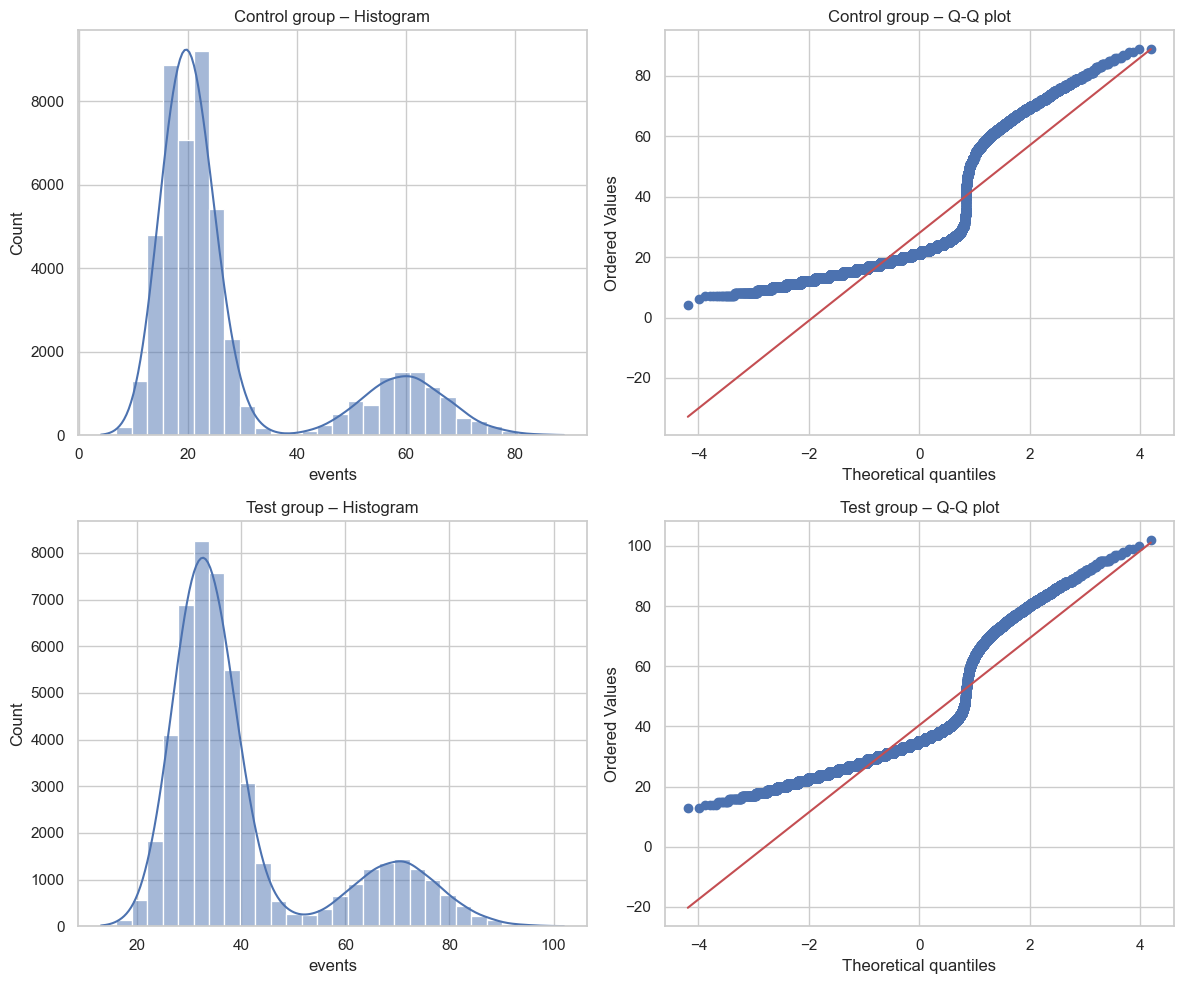

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(control, bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Control group – Histogram")

stats.probplot(control, dist="norm", plot=axes[0,1])
axes[0,1].set_title("Control group – Q-Q plot")

sns.histplot(test, bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Test group – Histogram")

stats.probplot(test, dist="norm", plot=axes[1,1])
axes[1,1].set_title("Test group – Q-Q plot")

plt.tight_layout()
plt.show()

In [48]:
control = ab[ab['group'] == 'control']['events']
test = ab[ab['group'] == 'test']['events']

In [49]:
stat, p = mannwhitneyu(control, test, alternative = 'two-sided')
print(f"Mann-Whitney: stat={stat:.3f}, p={p:.3f}")

Mann-Whitney: stat=476153686.000, p=0.000


In [52]:
if p < 0.05:
    print('Различия статистически значимы, новая кнопка реально влияет на число заказов')
else:
    print('Нет статистически значимых различий')

Различия статистически значимы, новая кнопка реально влияет на число заказов


In [58]:
def mw_segment(segment):
    control = ab[(ab['group']=='control') & (ab['segment']==segment)]['events']
    test = ab[(ab['group']=='test') & (ab['segment']==segment)]['events']

    stat, p = mannwhitneyu (control, test, alternative = 'two-sided')
    print(f'Сегмент {segment}: U={stat}, p={p}')
    if p < 0.05:
        print('Различия есть')
    else:
        print('Различий нет')
        
mw_segment('high')
mw_segment('low')

Сегмент high: U=19239616.5, p=0.0
Различия есть
Сегмент low: U=57905269.0, p=0.0
Различия есть


In [62]:
high = ab[ab['segment'] == "high"]["events"]
low = ab[ab['segment'] == "low"]["events"]

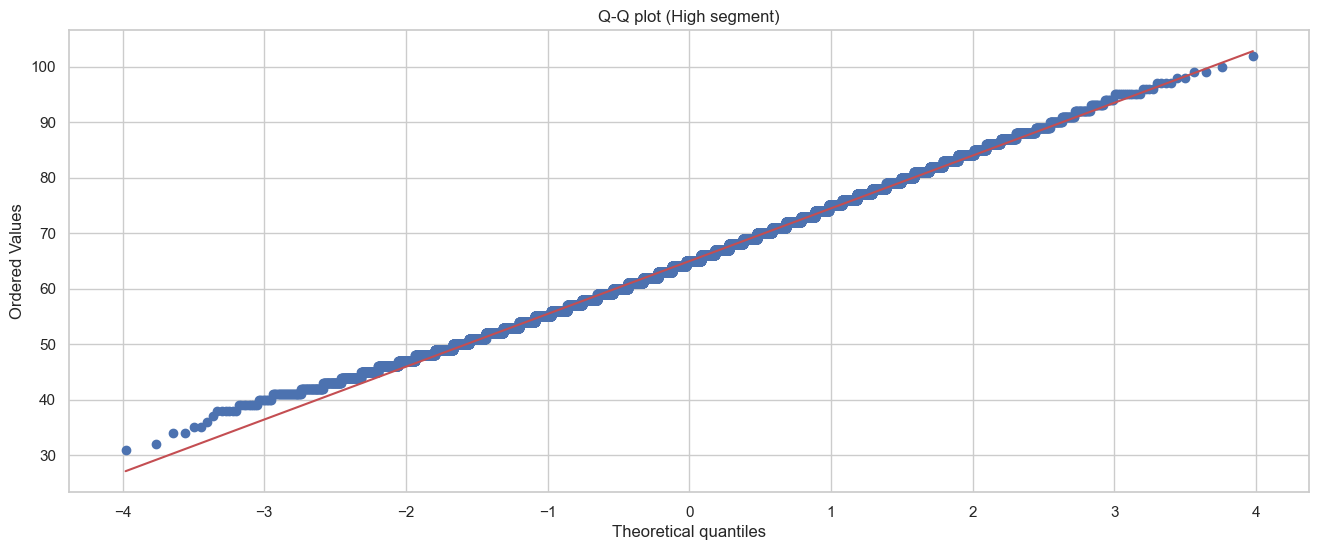

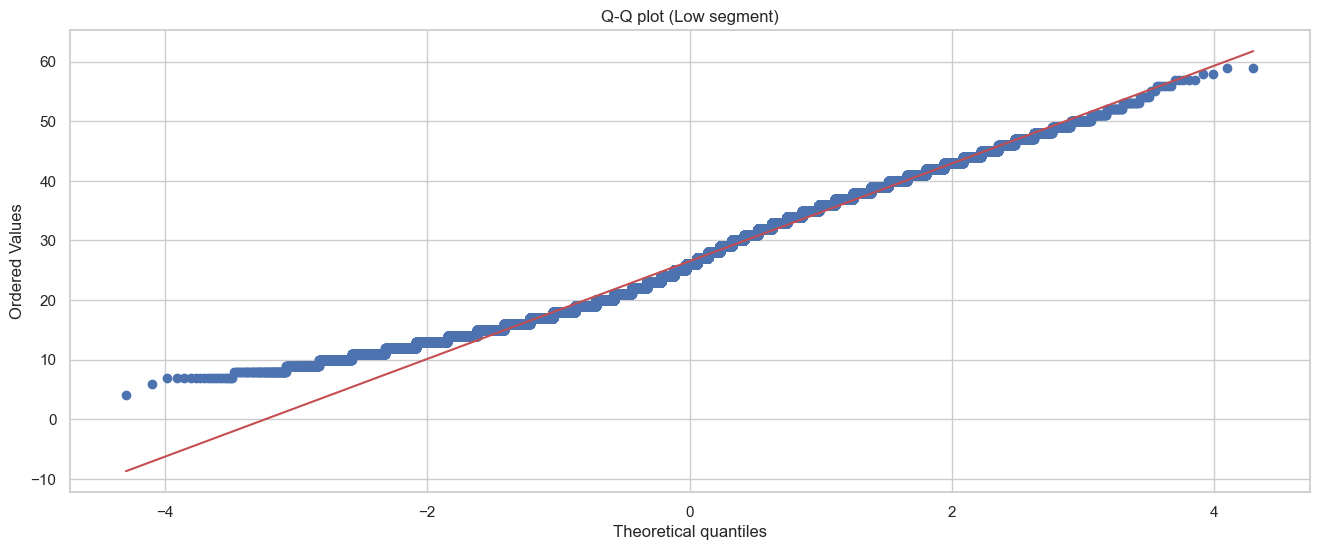

In [64]:
plt.figure(figsize=(16, 6))
stats.probplot(high, dist="norm", plot=plt)
plt.title("Q-Q plot (High segment)")
plt.show()

plt.figure(figsize=(16, 6))
stats.probplot(low, dist="norm", plot=plt)
plt.title("Q-Q plot (Low segment)")
plt.show()

**Новая кнопка увеличивает количество заказов**

**Наибольший эффект — у активных пользователей (High)**

**Рекомендации**
- Внедрить новую кнопку для всех пользователей.

- Дополнительно проанализировать поведение Low-сегмента, чтобы усилить эффект.

- Провести повторный A/B-тест с фокусом на retention (повторные заказы).